## Anomaly Detection using Local Outlier Factor 

Working with Mall-Customers dataset.

Source - Kaggle

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv('Mall_Customers.csv')

In [171]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [172]:
df.shape

(200, 5)

In [173]:
## Working woth only two features, Annual Income and Spending Score

df.drop(['CustomerID',	'Genre',  'Age'], axis=1, inplace=True)

In [174]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [175]:
## Anomaly detection 

from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=85, algorithm='auto', contamination=0.1, novelty=True)
clf.fit(df)
predictions = clf.predict(df)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [176]:
predictions

array([ 1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

'Predictions' with value as -1 are the outliers in the dataset. 

In [177]:
index = np.where(predictions==-1)

In [178]:
index

(array([  2,   6,   7,   8,  10,  11,  12,  14,  19, 185, 192, 193, 194,
        195, 196, 197, 198, 199]),)

These are the indexes of the -1 values in 'predictions' array.

In [179]:
x = df.values

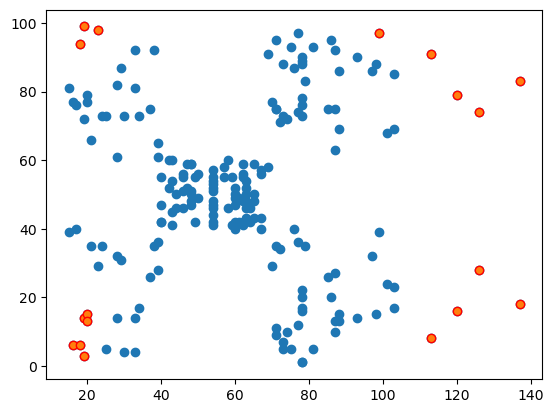

In [180]:
## Visualizng the outliers in a 2D frame

plt.scatter(x[:,0], x[:,1])
plt.scatter(x[index,0], x[index,1], edgecolors='red')

The red points on the graph are the outliers.